<a href="https://colab.research.google.com/github/P-Snehesh/Mini-project-ML-2020/blob/master/ML_Minor_Project_August_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bing-image-downloader

In [ ]:
! pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 2.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
cd /content/drive/My Drive/Internship August 2020/Minor project 

/content/drive/My Drive/Internship August 2020/Minor project


In [ ]:
!mkdir pictures

In [ ]:
cd pictures

/content/drive/My Drive/Internship August 2020/Minor project/pictures


In [ ]:
from bing_image_downloader import downloader
downloader.download('Smart Phones',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.kinja-img.com/gawker-media/image/upload/s--k_6GAALb--/c_fill,fl_progressive,g_center,h_900,q_80,w_1600/evtwgjgb3xbmtirbyawn.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/FEr9D2glDXA/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://d279m997dpfwgl.cloudfront.net/wp/2017/10/smartphone.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://storiesflistgv2.blob.core.windows.net/stories/2015/12/FlipTrends_smartphonesbanner2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://media.wired.com/photos/5ac7e4c0096e5714e419edca/master/w_2400,c_limit/pixel2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://smartphone2016.com/wp-content/uploads/2015/12/7-in-Our-List-of-Top-10-Smartphones-of-2015-iPhone-6S-Plus.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://img.gizchina.com/2017/10/sma

In [ ]:
from bing_image_downloader import downloader
downloader.download('Ultrabook Laptops',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i5.walmartimages.com/asr/1ec19e63-34db-4a45-95dd-67f2db05d25c_1.99f83adc0794403b823e933185b13599.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.bhphotovideo.com/images/images2500x2500/ASUS_UX31E_DH52_UX31E_DH52_13_3_Notebook_Computer_821614.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-LFMp5f3P_0o/T_O9BXXkxMI/AAAAAAAAAJI/sjRXzm78yX8/s1600/ASUS+Zenbook+Prime+UX31A+13.3-Inch+Ultrabook+3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.windowscentral.com/sites/wpcentral.com/files/styles/larger/public/field/image/2016/01/Book-9-15inch-press1.png?itok=SFS3LB-i
[%] File Downloaded !

[%] Downloading Image #5 from http://greatestten.com/wp-content/uploads/2013/03/Top-10-Best-Ultrabook-Laptops.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bhphotovideo.com/images/images2500x2500/toshiba_psu7fu_00y0

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Reshaping and flattening of data
out_pic = []
flat_pic = []
pic = []
path = '/content/drive/My Drive/Internship August 2020/Minor project/pictures/pictures/'
for dirpath, dirnames, filenames in os.walk(path):
  for files in filenames:
    dis = dirpath.split('/')[-1]
    out_pic.append(dis)
    img = imread(f'{path}{dis}/{files}')
    re_pic = resize(img,(100,100,3))
    flat_pic.append(re_pic.flatten())
    pic.append(re_pic)
flat_pic = np.array(flat_pic)
out_pic = np.array(out_pic)
pic= np.array(pic)


In [ ]:
print(flat_pic)

[[0.50588235 0.47843137 0.47058824 ... 0.83137255 0.8627451  0.86666667]
 [1.         1.         1.         ... 0.14117647 0.14117647 0.14117647]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.76078431 0.76078431 0.95359477 ... 0.74843137 0.68235294 0.93529412]]


In [ ]:
#Creating DataFrame
df = pd.DataFrame(flat_pic)
df['Output'] = out_pic
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Output
0,0.505882,0.478431,0.470588,0.513725,0.492157,0.478431,0.513725,0.486275,0.470588,0.521569,0.490196,0.478431,0.537255,0.503922,0.490196,0.545098,0.521569,0.505882,0.556863,0.537255,0.527451,0.560784,0.537255,0.523529,0.503922,0.472549,0.449020,0.513725,0.484314,0.462745,0.517647,0.490196,0.466667,0.519608,0.494118,0.468627,0.533333,0.511765,0.488235,0.556863,...,0.882353,0.917647,0.905882,0.882353,0.917647,0.909804,0.878431,0.913725,0.905882,0.878431,0.913725,0.905882,0.878431,0.913725,0.905882,0.882353,0.909804,0.909804,0.874510,0.909804,0.905882,0.866667,0.901961,0.898039,0.858824,0.898039,0.894118,0.854902,0.894118,0.890196,0.847059,0.886275,0.884314,0.835294,0.874510,0.874510,0.831373,0.862745,0.866667,Smart Phones
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,0.969804,0.969804,0.969804,0.703882,0.703882,0.703882,0.232510,0.232510,0.232510,0.128353,0.128353,0.128353,0.145098,0.145098,0.145098,0.145098,0.145098,0.145098,0.145098,0.145098,0.145098,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,0.141176,Smart Phones
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.000000,0.005882,0.000000,0.000000,0.003922,0.000000,0.000000,0.007843,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,0.000000,0.011765,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,Smart Phones
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.883824,0.883824,0.883824,0.890196,0.890196,0.890196,0.896078,0.896078,0.896078,0.900000,0.900000,0.900000,0.905882,0.905882,0.905882,0.911765,0.911765,0.911765,0.919039,0.919039,0.919039,0.936020,0.936020,0.936020,0.986333,0.986333,0.986333,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Smart Phones
4,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,...,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,Smart P

In [ ]:

df['Output'].value_counts()

Smart Phones         30
Ultrabook Laptops    30
Name: Output, dtype: int64

In [ ]:

df['Output'].nunique()

2

In [ ]:
# Training and testing data.
x = df.drop('Output',axis=1).values
y = df['Output'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
# Using gridsearch_cv for best param.
param= {'n_neighbors':np.arange(1,48)}
model = KNeighborsClassifier()
model_cv = GridSearchCV(model,param)
model_cv.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_cv.best_params_

{'n_neighbors': 8}

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred= model.predict(x_test)
y_pred

array(['Smart Phones', 'Ultrabook Laptops', 'Ultrabook Laptops',
       'Smart Phones', 'Ultrabook Laptops', 'Smart Phones',
       'Ultrabook Laptops', 'Ultrabook Laptops', 'Ultrabook Laptops',
       'Smart Phones', 'Ultrabook Laptops', 'Smart Phones',
       'Ultrabook Laptops', 'Smart Phones', 'Ultrabook Laptops'],
      dtype=object)

In [ ]:
y_test

array(['Smart Phones', 'Ultrabook Laptops', 'Ultrabook Laptops',
       'Smart Phones', 'Smart Phones', 'Smart Phones',
       'Ultrabook Laptops', 'Ultrabook Laptops', 'Ultrabook Laptops',
       'Smart Phones', 'Smart Phones', 'Smart Phones',
       'Ultrabook Laptops', 'Ultrabook Laptops', 'Ultrabook Laptops'],
      dtype=object)

In [ ]:
# Knowing the accuracy of the model.
accuracy_score(y_test,y_pred)

0.8

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5, 2],
       [1, 7]])

In [ ]:
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,Smart Phones,Ultrabook Laptops,All
Actual,,,
Smart Phones,5,2,7
Ultrabook Laptops,1,7,8
All,6,9,15


In [ ]:
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

     Smart Phones       0.83      0.71      0.77         7
Ultrabook Laptops       0.78      0.88      0.82         8

         accuracy                           0.80        15
        macro avg       0.81      0.79      0.80        15
     weighted avg       0.80      0.80      0.80        15



array(['Ultrabook Laptops'], dtype=object)

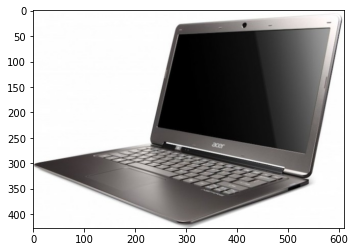

In [ ]:
#Predicting for any new image
fl = []
i = imread('https://cdn.ecoustics.com/db0/wblob/17BA35E873D594/C1/AB8B/nAy-CzCT1aCT3-n-RwMlj4bYzuM8ZcdFozcb-ylPTTU/692632-610x427.jpg')
re= resize(i,(100,100,3))
fl.append(re.flatten())
fl = np.array(fl)
plt.imshow(i)
y_pred = model.predict(fl)
y_pred
